{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-1-ce323ef387c1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)  # Replace missing values with column means
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The

--- Naive Bayes Evaluation ---
Accuracy: 0.9891304347826086
F1 Score: 0.9891304347826086
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        93
           1       0.98      1.00      0.99        91

    accuracy                           0.99       184
   macro avg       0.99      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184



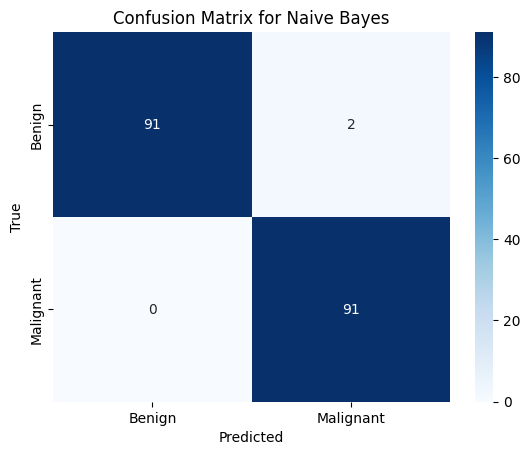

--- Decision Tree Evaluation ---
Accuracy: 0.9347826086956522
F1 Score: 0.9340659340659341
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        93
           1       0.93      0.93      0.93        91

    accuracy                           0.93       184
   macro avg       0.93      0.93      0.93       184
weighted avg       0.93      0.93      0.93       184



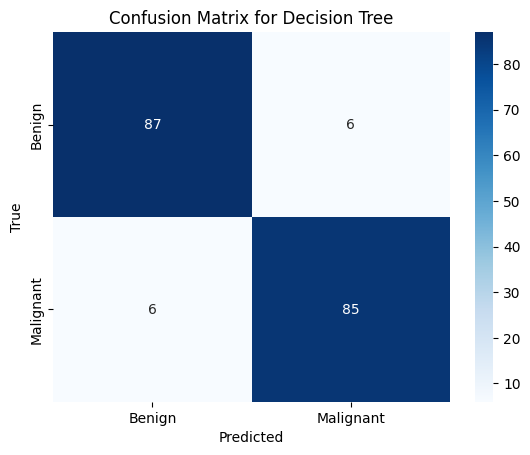

--- Random Forest Evaluation ---
Accuracy: 0.9836956521739131
F1 Score: 0.9837837837837838
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        93
           1       0.97      1.00      0.98        91

    accuracy                           0.98       184
   macro avg       0.98      0.98      0.98       184
weighted avg       0.98      0.98      0.98       184



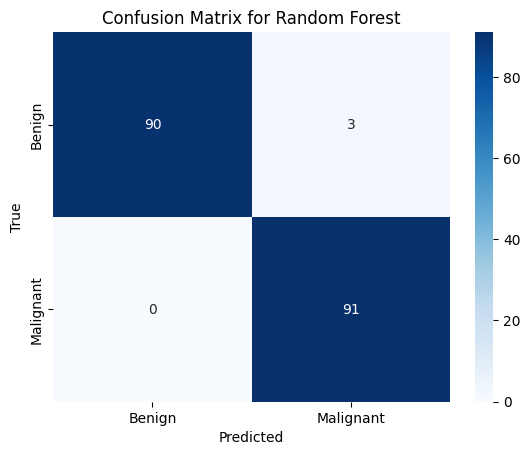

Random Forest ROC-AUC Score: 0.9838709677419355


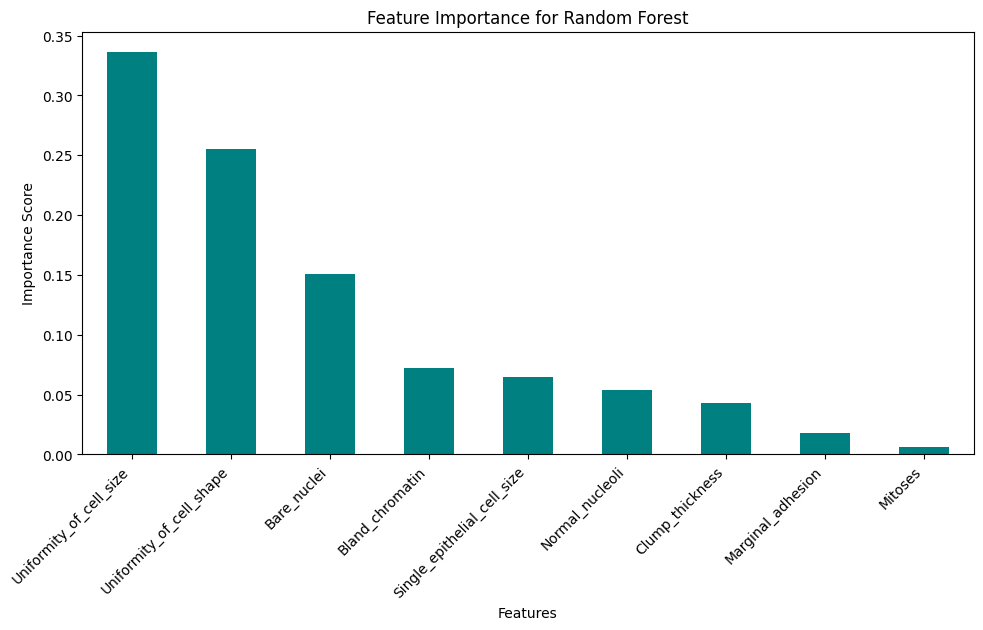

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE  # For handling class imbalance
import seaborn as sns
import matplotlib.pyplot as plt

# Install and import ucimlrepo to fetch the dataset
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch the Breast Cancer Wisconsin dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# Extract features (X) and target (y) from the dataset
X = breast_cancer_wisconsin_original.data.features  # Features
y = breast_cancer_wisconsin_original.data.targets   # Target

# Display metadata and variable information (optional for understanding dataset structure)
print(breast_cancer_wisconsin_original.metadata)
print(breast_cancer_wisconsin_original.variables)

# Data Preprocessing
# Encode target variable (B -> 0, M -> 1) for compatibility with ML algorithms
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check for missing values
if X.isnull().sum().sum() > 0 or y is None:
    print("Missing values found. Imputing...")
    X.fillna(X.mean(), inplace=True)  # Replace missing values with column means

# Handle potential class imbalance using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)  # Resample the dataset to balance classes

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features to standardize the range (important for some ML algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)        # Transform testing data using same scaler

# Model Training and Evaluation
# Naive Bayes Classifier
nb_model = GaussianNB()  # Initialize Naive Bayes model
nb_model.fit(X_train, y_train)  # Train the model
nb_predictions = nb_model.predict(X_test)  # Predict on test data

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)  # Initialize Decision Tree model
dt_model.fit(X_train, y_train)  # Train the model
dt_predictions = dt_model.predict(X_test)  # Predict on test data

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # Initialize Random Forest model
rf_model.fit(X_train, y_train)  # Train the model
rf_predictions = rf_model.predict(X_test)  # Predict on test data

# Evaluation Metrics
# Define a function to evaluate models and display results
def evaluate_model(model_name, y_true, y_pred):
    print(f"--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # Generate and display confusion matrix as a heatmap
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Evaluate Naive Bayes
evaluate_model("Naive Bayes", y_test, nb_predictions)

# Evaluate Decision Tree
evaluate_model("Decision Tree", y_test, dt_predictions)

# Evaluate Random Forest
evaluate_model("Random Forest", y_test, rf_predictions)

# Additional Metric: ROC-AUC Score
# Compute and display ROC-AUC score for Random Forest model (example)
rf_auc = roc_auc_score(y_test, rf_predictions)
print(f"Random Forest ROC-AUC Score: {rf_auc}")

# Analysis
# Plot feature importance for Random Forest (to demonstrate interpretability)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='teal')
# Adjust x-axis labels to slanted format for readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels at 45 degrees, align to the right, adjust font size
plt.tight_layout()  # Ensure everything fits within the figure boundaries
plt.title("Feature Importance for Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()
